In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
races = pd.read_csv('/kaggle/input/race-data/races.csv')
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [3]:
laptime = pd.read_csv('/kaggle/input/f1-laptime/lapTimes.csv')
laptime.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [4]:
laptime_with_year = laptime.merge(races[['raceId', 'year']], on='raceId', how='left')
laptime_with_year.head()


,raceId,driverId,lap,position,time,milliseconds,year
0,841,20,1,1,1:38.109,98109,2011
1,841,20,2,1,1:33.006,93006,2011
2,841,20,3,1,1:32.713,92713,2011
3,841,20,4,1,1:32.803,92803,2011
4,841,20,5,1,1:32.342,92342,2011


In [5]:
median_laptimes = laptime_with_year.groupby('year')['milliseconds'].median().reset_index()
median_laptimes.rename(columns={'milliseconds': 'median_laptime_ms'}, inplace=True)
median_laptimes.head()


,year,median_laptime_ms
0,1996,91468.0
1,1997,86798.5
2,1998,87636.0
3,1999,88937.0
4,2000,87895.0


Now graphically representing the data using matplotlib.

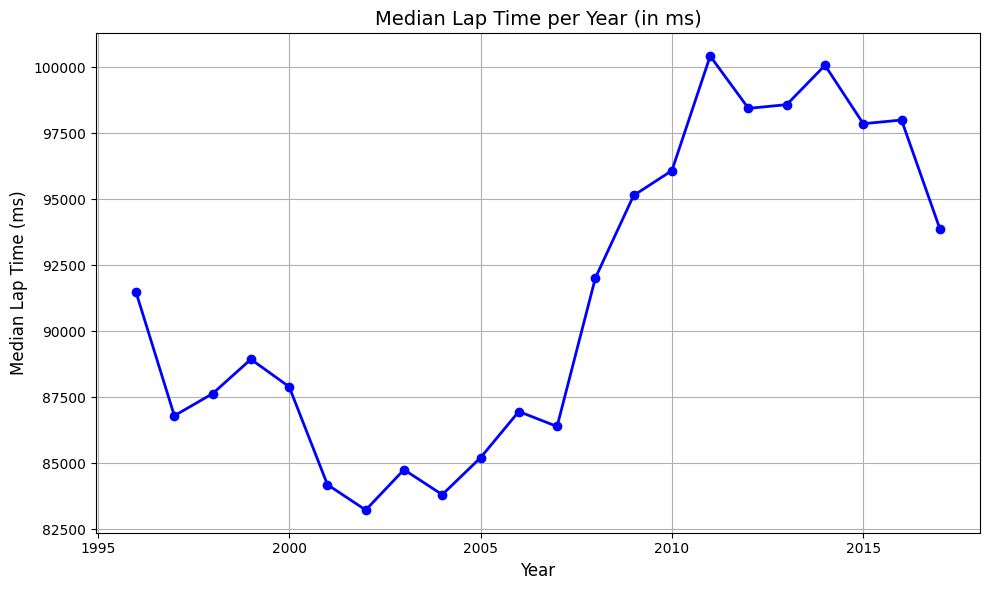

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(median_laptimes['year'], median_laptimes['median_laptime_ms'], marker='o', color='blue', linewidth=2)

# Titles and labels
plt.title('Median Lap Time per Year (in ms)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Lap Time (ms)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

now representing the fastest laptime by year.

In [7]:
fastest_laptimes = laptime_with_year.groupby('year')['milliseconds'].min().reset_index()
fastest_laptimes.rename(columns={'milliseconds': 'fastest_laptime_ms'}, inplace=True)
fastest_laptimes.head()


,year,fastest_laptime_ms
0,1996,78610
1,1997,71814
2,1998,72878
3,1999,72107
4,2000,71783


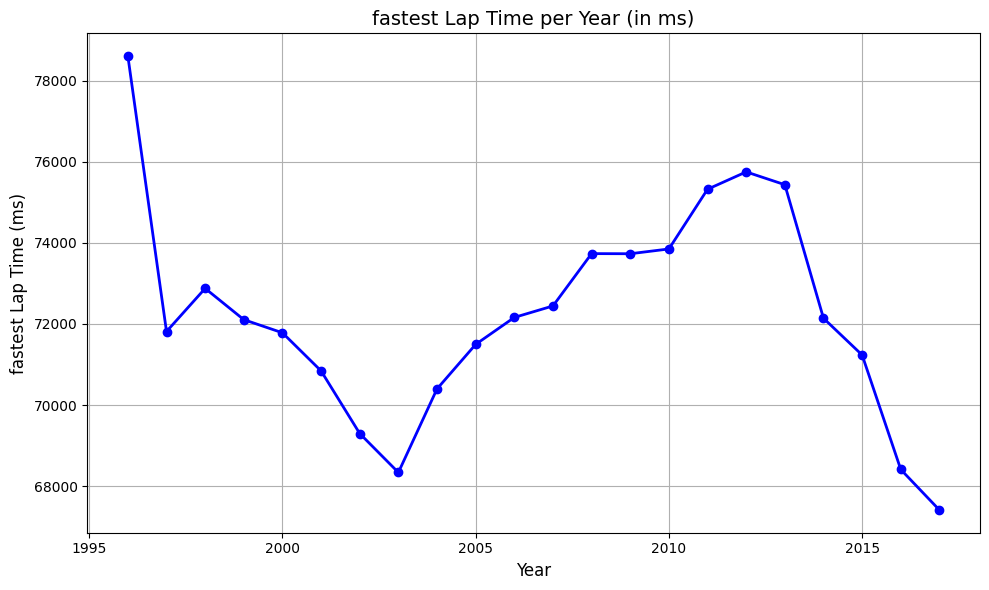

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(fastest_laptimes['year'], fastest_laptimes['fastest_laptime_ms'], marker='o', color='blue', linewidth=2)

# Titles and labels
plt.title('fastest Lap Time per Year (in ms)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('fastest Lap Time (ms)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()